# Short HW1 - Preparing for the course
### Useful python libraries, Probability, and Linear algebera

## Instructions

### General

*   **First, don't panic!**
    * This assignment seems longer than it actually is.
    * In the first part, you are mostly required to run *existing* code and complete short python commands here and there. 
    * In the two other parts you need to answer overall 4 analytic questions.
    * **Note**: The other 4 *short* assignments will be shorter and will *not* require programming.

*   **Individually or in pairs?** Individually only.
*   **Where to ask?** In the [Piazza forum](http://piazza.com/technion.ac.il/spring2022/236756).
*   **How to submit?** In the webcourse. 
*   **What to submit?** A *single* pdf file with the completed jupyter notebook (including the code, plots and other outputs) and the answers to the probability/algebra questions (Hebrew or English are both fine).  
If you worked with two pdf files, please merge them. 
Please submit the PDF file named like your ID number, e.g., `123456789.pdf`.
*   **When to submit?** Monday 04.04.2022 at 23:59.
    * **Late submissions**: each day of delay "costs" 5 points, up to 2 days.


### Specific

*  First part: get familiar with popular python libraries useful for machine learning and data science. We will use these libraries heavily throughout the major programming assignments.
   *  You should read the instructions and run the code blocks sequentially.  
   In $10$ places you are reqired to complete missing python commands or answer short questions (look for the **TODO** comments, or notations like **(T3)** etc.). Try to understand the flow of this document and the code you run.
   * Start by loading the provided jupyter notebook file (*Short_HW1.ipynb*) to [Google Colab](https://colab.research.google.com/), which is a very convenient online tool for running python scripts combined with text, visual plots, and more. 
   * Alternatively, you can [install jupyter](https://jupyter.org/install) locally on your computer and run the provided notebook there.
* Second and third parts: questions on probability and linear algebra to refresh your memory and prepare for the rest of this course.  
The questions are mostly analytic but also require completing and running simple code blocks in the jupyter notebook.
   * Forgot your linear algebra? Try watching [Essence of LA](https://www.youtube.com/playlist?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab) or reading [The Matrix Cookbook](http://www2.imm.dtu.dk/pubdb/views/edoc_download.php/3274/pdf/imm3274.pdf).
   * Forgot your probability? Try reading [Probability Theory Review for Machine Learning](https://see.stanford.edu/materials/aimlcs229/cs229-prob.pdf).
      * Correction: In 3.2 it says that $X\perp Y\Longrightarrow\text{Var}(X+Y)=\text{Var}(X)\text{Var}(Y)$ but it should say $X\perp Y\Longrightarrow\text{Var}(X+Y)=\text{Var}(X)+\text{Var}(Y)$.

### Important: How to submit the notebook's output?

You should only submit PDF file(s).
In the print dialog of your browser, you can choose to `Save as PDF`. However, notice that some of the outputs may be cropped (become invisible), which can harm your grade.

To prevent this from happening, tune the "scale" of the printed file, to fit in the *entire* output. For instance, in Chrome you should lower the value in `More settings->Scale->Custom` to contain the entire output (50%~ often work well).


# Good luck!

---

# What is pandas?
Python library for Data manipulation and Analysis
 - Provide expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive.
 - Aims to be the fundamental high-level building block for doing practical, real world data analysis in Python.
 - Built on top of NumPy and is intended to integrate well within a scientific computing.
 - Inspired by R and Excel.
 
Pandas is well suited for many different kinds of data:
- **Tabular data** with heterogeneously-typed columns, as in an SQL table or Excel spreadsheet
- Ordered and unordered (not necessarily fixed-frequency) **time series data**.
- **Arbitrary matrix data** (homogeneously typed or heterogeneous) with row and column labels
- Any other form of observational / statistical data sets (can be unlabeled)

Two primary data structures
- **Series** (1-dimensional) – Similar to a column in Excel’s spreadsheet
- **Data Frame** (2-dimensional) – Similar to R’s data frame

A few of the things that Pandas does well
- Easy handling of **missing data** (represented as NaN)
- Automatic and explicit **data alignment**
- Read and Analyze **CSV** , Excel Sheets Easily
- Operations
- Filtering, Group By, Merging, Slicing and Dicing, Pivoting and Reshaping
- Plotting graphs

Pandas is very useful for interactive data exploration at the data preparation stage of a project

The offical guide to Pandas can be found [here](http://pandas-docs.github.io/pandas-docs-travis/10min.html)

## Pandas Objects

In [ ]:
import pandas as pd
import numpy as np

**Series** is like a column in a spreadsheet.

In [ ]:
s = pd.Series([1,3.2,np.nan,'string'])
s

0         1
1       3.2
2       NaN
3    string
dtype: object

**DataFrame** is like a spreadsheet – a dictionary of Series objects

In [ ]:
data = [['ABC', -3.5, 0.01], ['ABC', -2.3, 0.12], ['DEF', 1.8, 0.03],
['DEF', 3.7, 0.01], ['GHI', 0.04, 0.43], ['GHI', -0.1, 0.67]]

df = pd.DataFrame(data, columns=['gene', 'log2FC', 'pval'])

df

,gene,log2FC,pval
0,ABC,-3.50,0.01
1,ABC,-2.30,0.12
2,DEF,1.80,0.03
3,DEF,3.70,0.01
4,GHI,0.04,0.43
5,GHI,-0.10,0.67


## Input and Output
How do you get data into and out of Pandas as spreadsheets?
 - Pandas can work with XLS or XLSX files.
 - Can also work with CSV (comma separated values) file
 - CSV stores plain text in a tabular form
 - CSV files may have a header
 - You can use a variety of different field delimiters (rather than a ‘comma’). Check which delimiter your file is using before import!
 
__Import to Pandas__  
 > `df = pd.read_csv('data.csv', sep='\t', header=0)`

For Excel files, it's the same thing but with read_excel

__Export to text file__  
 > `df.to_csv('data.csv', sep='\t', header=True, index=False)`
 
The values of header and index depend on if you want to print the column and/or row names

# Case Study – Analyzing Titanic Passengers Data

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import os


#set your working_dir
working_dir = os.path.join(os.getcwd(), 'titanic')

url_base = 'https://github.com/Currie32/Titanic-Kaggle-Competition/raw/master/{}.csv'
train_url = url_base.format('train')
test_url = url_base.format('test')

# For .read_csv, always use header=0 when you know row 0 is the header row
train = pd.read_csv(train_url, header=0)
test = pd.read_csv(test_url, header=0)
# You can also load a csv file from a local file rather than a URL


**(T1)** Use [`pandas.DataFrame.head`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) to display the top 6 rows of the `train` table





In [ ]:
# TODO: print the top 6 rows of the table
train.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


#### VARIABLE DESCRIPTIONS:
**Survived** - 0 = No; 1 = Yes  
**Age** - Passenger's age  
**Pclass** - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)  
**SibSp** - Number of Siblings/Spouses Aboard  
**Parch** - Number of Parents/Children Aboard  
**Ticket** - Ticket Number  
**Fare** - Passenger Fare  
**Cabin** - Cabin ID  
**Embarked** - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)  

In [ ]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Understanding the data (Summarizations)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train.shape

(891, 12)

In [ ]:
# Count values of 'Survived'
train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
# Calculate the mean fare price
train.Fare.mean()

32.2042079685746

In [ ]:
# General statistics of the dataframe
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Selection examples

#### Selecting columns

In [ ]:
# Selection is very similar to standard Python selection
df1 = train[["Name", "Sex", "Age", "Survived"]]
df1.head()

,Name,Sex,Age,Survived
0,"Braund, Mr. Owen Harris",male,22.0,0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1
2,"Heikkinen, Miss. Laina",female,26.0,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1
4,"Allen, Mr. William Henry",male,35.0,0


#### Selecting rows

In [ ]:
df1[10:15]

,Name,Sex,Age,Survived
10,"Sandstrom, Miss. Marguerite Rut",female,4.0,1
11,"Bonnell, Miss. Elizabeth",female,58.0,1
12,"Saundercock, Mr. William Henry",male,20.0,0
13,"Andersson, Mr. Anders Johan",male,39.0,0
14,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0


### Filtering Examples

#### Filtering with one condition

In [ ]:
# Filtering allows you to create masks given some conditions
df1.Sex == 'female' 

0      False
1       True
2       True
3       True
4      False
       ...  
886    False
887     True
888     True
889    False
890    False
Name: Sex, Length: 891, dtype: bool

In [ ]:
onlyFemale = df1[df1.Sex == 'female']
onlyFemale.head()

,Name,Sex,Age,Survived
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1
2,"Heikkinen, Miss. Laina",female,26.0,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,1
9,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1


#### Filtering with multiple conditions
**(T2)** Alter the following command so `adultFemales` will contain only females whose age is 18 and above.  
You need to filter using a **single** mask with multiple conditions (google it!), i.e., without creating any temporary dataframes.

Additionally, update the `survivalRate` variable to show the correct rate.

In [ ]:
# TODO: update the mask
adultFemales = df1[(df1.Sex == 'female') & (df1.Age >= 18) ]

# TODO: Update the survival rate

survivalRate = len (adultFemales[(adultFemales.Survived==1)]) / (len (adultFemales))
print("The survival rate of adult females was: {:.2f}%".format(survivalRate * 100))

The survival rate of adult females was: 77.18%


## Aggregating
Pandas allows you to aggregate and display different views of your data.

In [ ]:
df2 = train.groupby(['Pclass', 'Sex']).Fare.agg(np.mean)
df2

Pclass  Sex   
1       female    106.125798
        male       67.226127
2       female     21.970121
        male       19.741782
3       female     16.118810
        male       12.661633
Name: Fare, dtype: float64

In [ ]:
pd.pivot_table(train, index=['Pclass'], values=['Survived'], aggfunc='count')

,Survived
Pclass,
1,216
2,184
3,491


The following table shows the survival rates for each combination of passenger class and sex.  
**(T3)** Add a column showing the mean **age** for such a combination.

In [ ]:
# TODO: Also show the mean age per group
pd.pivot_table(train, index=['Pclass', 'Sex'], values=['Survived', 'Age'],
               aggfunc={'Age': np.mean, 'Survived': np.mean})

Age  Survived
Pclass Sex                        
1      female  34.611765  0.968085
       male    41.281386  0.368852
2      female  28.722973  0.921053
       male    30.740707  0.157407
3      female  21.750000  0.500000
       male    26.507589  0.135447

**(T4)** Use [this](https://stackoverflow.com/questions/21441259/pandas-groupby-range-of-values) question on stackoverflow, to find the mean survival rate for ages 0-10, 10-20, etc.).

In [ ]:
# TODO: find the mean survival rate per age group
ageGroups = np.arange(0, 81, 10) 
survivalPerAgeGroup = df1.groupby(pd.cut(df1["Age"],ageGroups)).mean()

 


In [ ]:
survivalPerAgeGroup


,Age,Survived
Age,,
"(0, 10]",4.268281,0.593750
"(10, 20]",17.317391,0.382609
"(20, 30]",25.423913,0.365217
"(30, 40]",35.051613,0.445161
"(40, 50]",45.372093,0.383721
"(50, 60]",54.892857,0.404762
"(60, 70]",63.882353,0.235294
"(70, 80]",73.300000,0.200000


## Filling missing data (data imputation)

Note that some passenger do not have age data.

In [ ]:
print("{} out of {} passengers do not have a recorded age".format(df1[df1.Age.isna()].shape[0], df1.shape[0]))

177 out of 891 passengers do not have a recorded age


In [ ]:
df1[df1.Age.isna()].head()

,Name,Sex,Age,Survived
5,"Moran, Mr. James",male,NaN,0
17,"Williams, Mr. Charles Eugene",male,NaN,1
19,"Masselmani, Mrs. Fatima",female,NaN,1
26,"Emir, Mr. Farred Chehab",male,NaN,0
28,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,1


Let's see the statistics of the column **before** the imputation.

In [ ]:
df1.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Read about [`pandas.Series.fillna`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.fillna.html?highlight=fillna#pandas.Series.fillna).  
 **(T5)** Replace the missing ages `df1` with the general age *median*, and insert the result into variable `filledDf` (the original `df1` should be left unchanged).

In [ ]:
# TODO : Fill the missing values
filledDf = df1.copy()
filledDf['Age'].fillna(df1['Age'].median(), inplace=True)






In [ ]:
print("{} out of {} passengers do not have a recorded age".format(filledDf[filledDf.Age.isna()].shape[0], filledDf.shape[0]))

0 out of 891 passengers do not have a recorded age


Let's see the statistics of the column **after** the imputation.

In [ ]:
filledDf.Age.describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

 **(T6)** Answer below: which statistics changed, and which have not? Why? (explain briefly, no need to be very formal.)

**Answer:** 
The count has grown, because after the change, all the passengers have a recorded age.
The mean has been decreased , because now all the passengers influence the mean calculation, and thus the result changes. 
The standart deviation has been decreased, because after the change, more passengers are documented with a recorded age which is around the median.
The distribution has changed, because now there is more data, but the extremum values are the same, as the missing ages have been replaced with the median.
In conclusion, the max and min values are the same, and all the rest changed.

## Plotting
Basic plotting in pandas is pretty straightforward

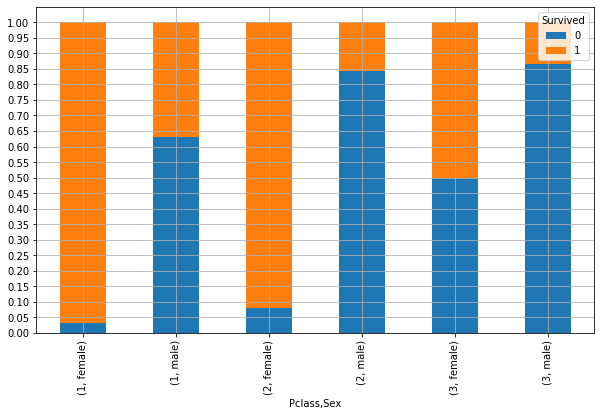

In [ ]:
new_plot = pd.crosstab([train.Pclass, train.Sex], train.Survived, normalize="index")
new_plot.plot(kind='bar', stacked=True, grid=False, figsize=(10,6))
plt.yticks(np.linspace(0,1,21))
plt.grid()

 **(T7)** Answer below: which group (class $\times$ sex) had the best survival rate? Which had the worst?

**Answer:** 
(1, female) is the group with the best survival rate-more than 95%. 
(3, male) is the group with the worst survival rate-less than 15%.


# What is Matplotlib

A 2D plotting library which produces publication quality figures.
 - Can be used in python scripts, the python and IPython shell, web application servers, and more …
 - Can be used to generate plots, histograms, power spectra, bar charts, errorcharts, scatterplots, etc.
 - For simple plotting, pyplot provides a MATLAB-like interface 
 - For power users, a full control via OO interface or via a set of functions

There are several Matplotlib add-on toolkits
 - Projection and mapping toolkits [basemap](http://matplotlib.org/basemap/) and [cartopy](http://scitools.org.uk/cartopy/).
 - Interactive plots in web browsers using [Bokeh](http://bokeh.pydata.org/en/latest/).
 - Higher level interface with updated visualizations [Seaborn](http://seaborn.pydata.org/index.html).

Matplotlib is available at [www.matplotlib.org](www.matplotlib.org)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

## Line Plots

The following code plots the survival rate per age group (computed above, before the imputation).

 **(T8)** Use the [matplotlib documentation](https://matplotlib.org/) to add a grid and suitable axis labels to the following plot.

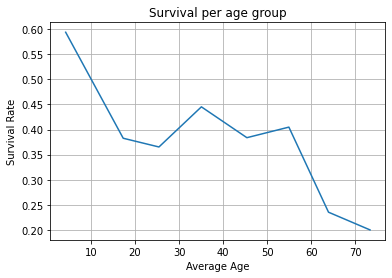

In [ ]:
# axs= plt.plot(survivalPerAgeGroup.Age, survivalPerAgeGroup.Survived)
#_ = plt.title("Survival per age group")
fig, ax = plt.subplots()
ax.plot(survivalPerAgeGroup.Age, survivalPerAgeGroup.Survived)
ax.set_title("Survival per age group")
ax.set_xlabel('Average Age')
ax.set_ylabel('Survival Rate')
ax.grid(True)
# TODO : Update the plot as required.

In [ ]:
survivalPerAgeGroup

,Age,Survived
Age,,
"(0, 10]",4.268281,0.593750
"(10, 20]",17.317391,0.382609
"(20, 30]",25.423913,0.365217
"(30, 40]",35.051613,0.445161
"(40, 50]",45.372093,0.383721
"(50, 60]",54.892857,0.404762
"(60, 70]",63.882353,0.235294
"(70, 80]",73.300000,0.200000



## Scatter plots

 **(T9)** Alter the [matplotlib.pyplot.scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) command, so that the scattered dots will be `green`, and their size will be `5`.

Also, add a grid and suitable axis labels.

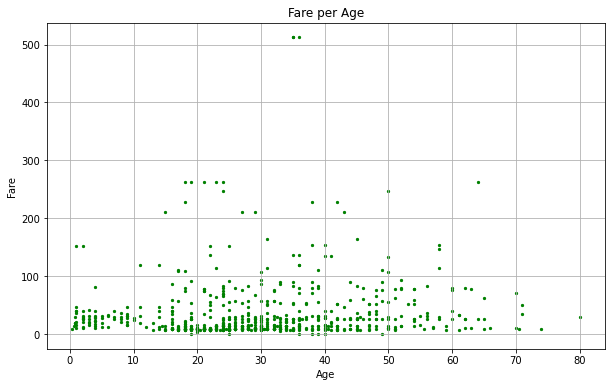

In [ ]:
# TODO : Update the plot as required.
plt.figure(figsize=(10,6))
plt.scatter(train.Age, train.Fare,5,  color='green')
plt.title("Fare per Age")
plt.xlabel('Age')
plt.ylabel('Fare')
plt.grid(True)


**(T10)** Answer below: approximately how old are the two highest paying passengers?

**Answer:** 
The two highest paying passengers are approximately 34 and 35, respectively.

----

# Probability refresher

## Q1 - Variance of empirical mean

Let $X_1, \dots, X_m$ be i.i.d random variables with mean $\mathbb{E}\left[X_i\right]=\mu$ and variance $\text{Var}\left(X_i \right)=\sigma^2$.  
We would like to "guess", or more formally, estimate (לְשַׁעֲרֵךְ), the mean $\mu$ from the observations $x_1,\dots,x_m$.  
We use the empirical mean $\overline{X} = \frac{1}{m}\sum_i X_i$ as an estimator for the unknown mean $\mu$. Notice that $\overline{X}$ is itself a random variable.  
**Note:** The instantiation of  $\overline{X}$ is usually denoted by $\hat{\mu}=\frac{1}{m}\sum_i x_i$, but this is currently out of scope.

1.   Express analytically the expectation of $\overline{X}$.  
     **Answer:**  (m*μ)*(1/m)= μ, by the linearity of expectation.
2.   Express analytically the variance of $\overline{X}$.  
     **Answer:** since cov(Xi, Xj)= 0 for every 0<=i,j<=m, as Xi, Xj are i.i.d, we get: var(∑Xi)= ∑var⁡(x_i )= m*σ^2
     hence, var(Xbar)= var((1/m)*∑Xi)= m*(σ^2)*(1/m^2)= (σ^2)/m
   

You will now verify the expression you wrote for the variance.  
We assume $\forall i: X_i\sim\mathcal{N}\left(0, 1\right)$.  
We compute the empirical mean's variances for sample sizes $m=1,\dots,25$.  
For each sample size $m$, we sample $m$ normal variables and compute their empirical mean. We repeat this step $100$ times, and compute the variance of the empirical means (for each $m$).

3.   Complete the code blocks below according to the instructions and verify that your analytic function of the empirical mean's variance against as a function of $m$ suits the empirical findings.


In [ ]:
all_sample_sizes = range(1, 26)
repeats_per_size = 100

allVariances = []

for m in all_sample_sizes:
  empiricalMeans = []
  
  for _ in range(repeats_per_size):
    # Random m examples and compute their empirical mean
    X = np.random.randn(m)
    empiricalMeans.append(np.mean(X))

  # TODO: Using numpy, compute the variance of the empirical means that are in 
  # the `empiricalMeans` list (you can google the numpy function for variance)
  variance = np.var(empiricalMeans)
  
  allVariances.append(variance)

Complete the following computation of the anayltic variance (according to the your answers above).
You can try to use simple arithmetic operations between an `np.array` and a scalar, and see what happens! (for instance, `2 * np.array(all_sample_sizes)`.)

In [ ]:
# TODO: compute the analytic variance 
# (the current command wrongfully sets the variance of an empirical mean 
#  of a sample with m variables simply as m)
analyticVariance =np.reciprocal(np.array(all_sample_sizes).astype(float))

The following code plots the results from the above code. **Do not** edit it, only run it.

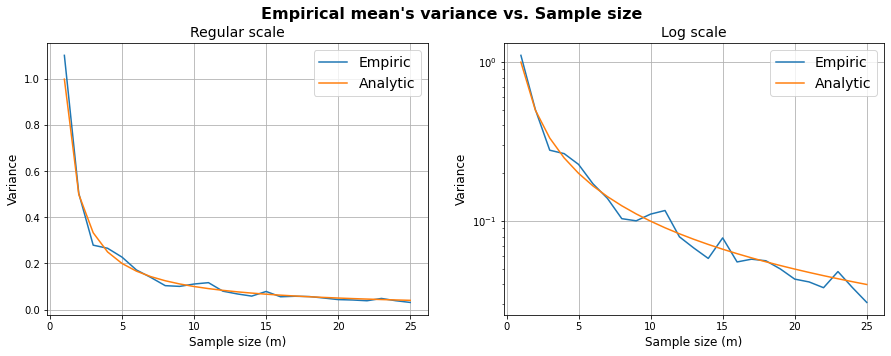

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
axes[0].plot(all_sample_sizes, allVariances, label="Empiric")
axes[0].plot(all_sample_sizes, analyticVariance, label="Analytic")
axes[0].grid()
axes[0].legend(fontsize=14)
axes[0].set_title("Regular scale", fontsize=14)
axes[0].set_xlabel("Sample size (m)", fontsize=12)
axes[0].set_ylabel("Variance", fontsize=12)

axes[1].semilogy(all_sample_sizes, allVariances, label="Empiric")
axes[1].semilogy(all_sample_sizes, analyticVariance, label="Analytic")
axes[1].grid()
axes[1].legend(fontsize=14)
axes[1].set_title("Log scale", fontsize=14)
axes[1].set_xlabel("Sample size (m)", fontsize=12)
axes[1].set_ylabel("Variance", fontsize=12)

_ = plt.suptitle("Empirical mean's variance vs. Sample size", 
             fontsize=16, fontweight="bold")

## Reminder - Hoeffding's Inequality
Let $\theta_1, \dots, \theta_m$ be i.i.d random variables with mean $\mathbb{E}\left[\theta_i\right]=\mu$.

Additionally, assume all variables are bound such that $\Pr\left[a\le \theta_i \le b\right] = 1$.

Then, for any $\epsilon > 0$, the empirical mean $\overline{\theta} = \frac{1}{m}\sum_i \theta_i$ holds:
$$\Pr\left[\left| \overline{\theta}-\mu \right| > \epsilon\right] 
\le 
2\exp\left\{-\frac{2m\epsilon^2}{\left(b-a\right)^2}\right\}~.$$


## Q2 - Identical coins and the Hoeffding bound
We toss $m\in\mathbb{N}$ identical coins, each coin $50$ times.  
All coins have the same *unknown* probability of showing "heads", denoted by $𝑝 ∈ (0,1)$.  
Let $\theta_𝑖$ be the (observed) number of times the $i$-th coin showed "heads".  


1.   What is the distribution of each $\theta_𝑖$?    
  **Answer:** Binomial distribution i.e.
((50 choose n))⋅P^n⋅(1-P)^(50-n)
  
2.   What is the mean $\mu = \mathbb{E}\left[\theta_𝑖\right]$?  
  **Answer:** m*p= 50*p

3.   We would like to use the empirical mean defined above as an estimator $\overline{\theta}$ for $\mu$.  
Use Hoeffding’s inequality to compute the *smallest* error $\epsilon$
that can be guaranteed with
confidence $0.95$ using $m=100$ samples
(notice that we wish to estimate $\mu$, not $p$).  
That is, find the smallest $\epsilon$ that holds 
$\Pr\left[\left| \overline{\theta}-\mu \right| > \epsilon\right] \le 0.05$ given $m=100$ samples (find $\epsilon$ up to 2 decimal points).  
  **Answer:** Given that b-a= 50,m=100, and using Hoeffding bound for 0.05, we get that the smallest epsilon that satisfies the demand is ϵ= 6.79

4.  The following code simulates tossing $m=10^4$ coins, each $50$ times. For each coin, we use the empirical mean as the estimator and save it in the `all_estimators` array. The (unknown) probability of each coin is $0.7$.  
Complete the missing part so that for each coin, an array of $50$ binary `observations` will be randomized according to the probability $p$.

In [ ]:
m = 10**4
tosses = 50
p = 0.7
all_estimators = []

# Repeat for n coins
for coin in range(m):
  # TODO: Use Google to find a suitable numpy.random function that creates 
  # a binary array of size (tosses,), where each element is 1 
  # with probability p, and 0 with probability (1-p).
  observations = np.random.binomial(tosses,p)

  # Compute and save the empirical mean
  estimator = np.mean(observations)
  all_estimators.append(estimator)

5.  The following code plots the histogram of the estimators (empirical means). Run it. What type of distribution is obtained (no need to specify the exact paramters of the distribution)? Explain **briefly** what theorem from probability explains this behavior (and why).  

  **Answer:**  Normal distribution is obtained. The Central Limit Theorem explains this behavior, as it asserts that when independent random variables are summed up, their properly normalized sum tends toward a normal distribution  even if the original variables themselves are not normally distributed.

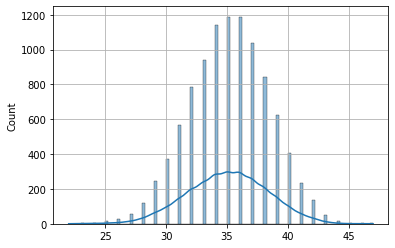

In [ ]:
import seaborn as sns
sns.histplot(all_estimators, bins=100, kde=True) 
plt.grid()

----
# Numerical linear algebera refresher

## Reminder - Positive semi-definite matrices

A symmetric real matrix $A\in\mathbb{R}^{n \times n}$ is called positive semi-definite (PSD) iff:
$$\forall x\in\mathbb{R}^n \setminus{\left\{0_n\right\}}: x^\top A x \ge 0.$$
If the matrix holds the above inequality *strictly*, the matrix is called positive definite.

## Q3 - PSD matrices
1. Let $A\in\mathbb{R}^{n \times n}$ be a symmetric PSD matrix.
Recall that all eigenvalues of real symmetric matrices are real.  
Prove that all the eigenvalues of $A$ are non-negative.  

2. Let $A,B\in\mathbb{R}^{n \times n}$ be two symmetric PSD matrices.   
  **Prove or refute:** the matrix $A+B$ is also PSD.

## Q4 - Gradients

Define $f:\mathbb{R}^{d}\to\mathbb{R}$, where $f(w)=w^\top x + b$, for some vector $w\in\mathbb{R}^{d}$ and a scalar $b\in\mathbb{R}$.

Recall: the gradient vector is defined as 
$\nabla_w f=\left[\frac{\partial f}{\partial w_1},\dots,\frac{\partial f}{\partial w_d}\right]^\top \in \mathbb{R}^d$.
1. Prove that $\nabla_w f = x$.

Recall/read the definition of the [Hessian matrix](https://en.wikipedia.org/wiki/Hessian_matrix#Definitions_and_properties) $\nabla_w^2 f \in \mathbb{R}^{d\times d}$.
2. Find the Hessian matrix $\nabla_w^2 f$ of the function $f$ defined in this question.
3. Is the matrix you found positive semi-definite? Explain.

Now, define $g:\mathbb{R}^{d}\to\mathbb{R}$, 
where $g(w)=\left\Vert w \right\Vert^2$.

4. Find the gradient vector $\nabla_w g$.
5. Find the Hessian matrix $\nabla_w^2 g$.
6. Is the matrix you found positive semi-definite? Explain.